In [2]:
pip install aspose-words 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import statistics
import re
plt.rcParams["figure.figsize"] = [12, 8]
import warnings
warnings.filterwarnings('ignore')

In [6]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_spss("Birthweight_reduced_kg_SPSS.sav")

In [4]:
df.head()

,ID,Headcirc,Length,Birthweight,Gestation,mage,smoker,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,mnocig
0,1360.0,34.0,56.0,4.55,44.0,20.0,Non-smoker,162.0,57.0,23.0,10.0,35.0,179.0,Not low birthweight,Aged < 35,0.0
1,1016.0,36.0,53.0,4.32,40.0,19.0,Non-smoker,171.0,62.0,19.0,12.0,0.0,183.0,Not low birthweight,Aged < 35,0.0
2,462.0,39.0,58.0,4.10,41.0,35.0,Non-smoker,172.0,58.0,31.0,16.0,25.0,185.0,Not low birthweight,Aged 35+,0.0
3,1187.0,38.0,53.0,4.07,44.0,20.0,Non-smoker,174.0,68.0,26.0,14.0,25.0,189.0,Not low birthweight,Aged < 35,0.0
4,553.0,37.0,54.0,3.94,42.0,24.0,Non-smoker,175.0,66.0,30.0,12.0,0.0,184.0,Not low birthweight,Aged < 35,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ID           42 non-null     float64 
 1   Headcirc     42 non-null     float64 
 2   Length       42 non-null     float64 
 3   Birthweight  42 non-null     float64 
 4   Gestation    42 non-null     float64 
 5   mage         42 non-null     float64 
 6   smoker       42 non-null     category
 7   mheight      42 non-null     float64 
 8   mppwt        42 non-null     float64 
 9   fage         42 non-null     float64 
 10  fedyrs       42 non-null     float64 
 11  fnocig       42 non-null     float64 
 12  fheight      42 non-null     float64 
 13  lowbwt       42 non-null     category
 14  mage35       42 non-null     category
 15  mnocig       42 non-null     float64 
dtypes: category(3), float64(13)
memory usage: 4.9 KB


In [5]:
df.duplicated().value_counts()

False    42
dtype: int64

In [6]:
df.isnull().sum() 

ID             0
Headcirc       0
Length         0
Birthweight    0
Gestation      0
mage           0
smoker         0
mheight        0
mppwt          0
fage           0
fedyrs         0
fnocig         0
fheight        0
lowbwt         0
mage35         0
mnocig         0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,42.0,894.071429,467.616186,27.00,537.25,821.000,1269.5000,1764.00
Headcirc,42.0,34.595238,2.399792,30.00,33.00,34.000,36.0000,39.00
Length,42.0,51.333333,2.935624,43.00,50.00,52.000,53.0000,58.00
Birthweight,42.0,3.312857,0.603895,1.92,2.94,3.295,3.6475,4.57
Gestation,42.0,39.190476,2.643336,33.00,38.00,39.500,41.0000,45.00
mage,42.0,25.547619,5.666342,18.00,20.25,24.000,29.0000,41.00
mheight,42.0,164.452381,6.504041,149.00,161.00,164.500,169.5000,181.00
mppwt,42.0,57.500000,7.198408,45.00,52.25,57.000,62.0000,78.00
fage,42.0,28.904762,6.863866,19.00,23.00,29.500,32.0000,46.00
fedyrs,42.0,13.666667,2.160247,10.00,12.00,14.000,16.0000,16.00


### Data Visualization

In [10]:
gestation = list(df.Gestation)
birthweight = list(df.Birthweight)
mage = list(df.mage)

In [15]:
birthweight = np.array(birthweight)
np_birthweight = birthweight * 70

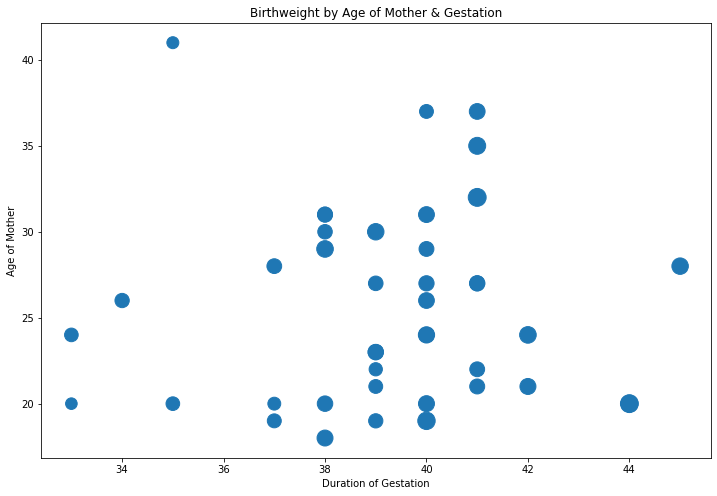

In [17]:
plt.scatter(gestation, mage, s = np_birthweight)
plt.xlabel('Duration of Gestation')
plt.ylabel('Age of Mother')
plt.title('Birthweight by Age of Mother & Gestation')
plt.show();


### Data Insights

In the given dataset, we have two types of mothers one who Non-smoker and another who are Smoker. So, we can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [8]:
df[df['smoker'] == 'Non-smoker'].shape[0]

20

In [9]:
df[df['smoker'] == 'Smoker'].shape[0]

22

In [10]:
df_non_smoker = df[(df.smoker == 'Non-smoker')]

In [11]:
df_smoker = df[(df.smoker == 'Smoker')]

In [12]:
df_smoker.head()

,ID,Headcirc,Length,Birthweight,Gestation,mage,smoker,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,mnocig
20,792.0,38.0,53.0,3.64,40.0,20.0,Smoker,170.0,59.0,24.0,12.0,12.0,185.0,Not low birthweight,Aged < 35,2.0
21,1388.0,33.0,51.0,3.14,41.0,22.0,Smoker,160.0,53.0,24.0,16.0,12.0,176.0,Not low birthweight,Aged < 35,7.0
22,575.0,30.0,50.0,2.78,37.0,19.0,Smoker,165.0,60.0,20.0,14.0,0.0,183.0,Not low birthweight,Aged < 35,7.0
23,569.0,35.0,50.0,2.51,39.0,22.0,Smoker,159.0,52.0,23.0,14.0,25.0,200.0,Low birthweight,Aged < 35,7.0
24,1363.0,30.0,48.0,2.37,37.0,20.0,Smoker,163.0,47.0,20.0,10.0,35.0,185.0,Low birthweight,Aged < 35,7.0


### Q1. What is the mean birth weight for babies of non-smoking mothers?

In [13]:
Baby_Weight_Non_Smoker = list(df_non_smoker["Birthweight"])

In [14]:
x = statistics.mean(Baby_Weight_Non_Smoker)

In [15]:
x

3.5095

### Q2. What is the mean birth weight for babies of smoking mothers?

In [16]:
Baby_Weight_Smoker = list(df_smoker["Birthweight"])

In [17]:
y = statistics.mean(Baby_Weight_Smoker)

In [18]:
y

3.1340909090909093

### Q3. What is the mean head circumference for babies of non-smoking mothers?

In [19]:
Baby_Head_Circumference = list(df_non_smoker["Headcirc"])

In [20]:
z = statistics.mean(Baby_Head_Circumference)

In [21]:
z

35.05

### Q4. What is the mean gestational age at birth for babies of smoking mothers?

In [22]:
df_smoker[['Gestation']].mean()

Gestation    38.954545
dtype: float64

### Q5. What is the maximum head circumference for babies of non-smoking mothers?

In [23]:
df_non_smoker[['Headcirc']].max()

Headcirc    39.0
dtype: float64

### Q6. What is the minimum gestational age at birth for babies of smoking mothers?

In [24]:
df_smoker[['Gestation']].min()

Gestation    33.0
dtype: float64

### Q7. Based on the dataset you have, out of the two, which one would be a better bet:



Pregnancy period in smoking mothers is shorter or
Pregnancy period in non-smoking mothers is shorter

In [25]:
df_smoker[['Gestation']].mean()

Gestation    38.954545
dtype: float64

In [26]:
df_non_smoker[['Gestation']].mean()

Gestation    39.45
dtype: float64

### Q8. Justify the above choice in a few words.

Pregnancy period in smoking mothers is shorter than Pregnancy period in non-smoking mothers.

### Q9. What is the baby birth weight range for babies of smoking mothers?

In [27]:
df_smoker[['Birthweight']].max()

Birthweight    4.57
dtype: float64

In [28]:
df_smoker[['Birthweight']].min()

Birthweight    1.92
dtype: float64

In [29]:
Range_smoker = df_smoker[['Birthweight']].max() - df_smoker[['Birthweight']].min()

In [30]:
Range_smoker

Birthweight    2.65
dtype: float64

Baby birth weight range of smoking mothers is from 1.92 kg to 4.57. Range = 2.65

### Q10. In your own words describe what the value of the above range for baby's birthweight tells us about smoking versus non-smoking mothers?

In [31]:
df_non_smoker[['Birthweight']].max()

Birthweight    4.55
dtype: float64

In [32]:
df_non_smoker[['Birthweight']].min()

Birthweight    2.65
dtype: float64

In [33]:
Range_non_smoker = df_non_smoker[['Birthweight']].max() - df_non_smoker[['Birthweight']].min()

In [34]:
Range_non_smoker

Birthweight    1.9
dtype: float64

Range for baby's birthweight (1.9) of non-smoking mothers is smaller than range for baby's birthweight (2.65) of smoking mothers.

### Q11. Are head circumference data for babies of smoking mothers normally distributed?

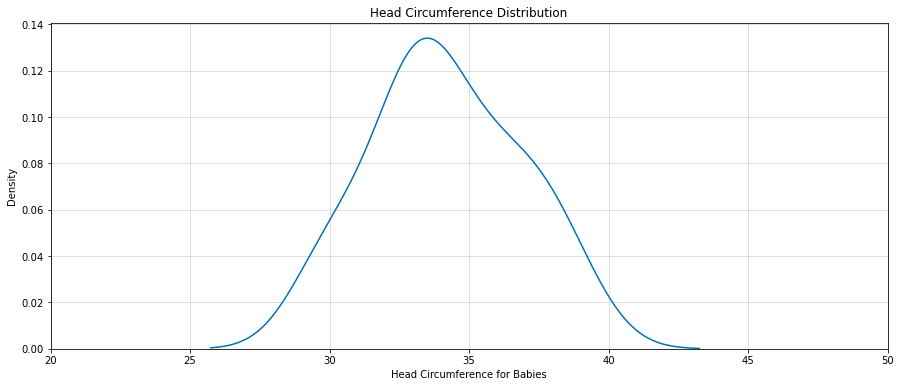

In [83]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['smoker'] == 'Smoker', 'Headcirc'], label = 'Head circumference for babies of smoking mothers')

plt.xlim(left=20, right=50)
plt.xlabel('Head Circumference for Babies')
plt.ylabel('Density')
plt.title('Head Circumference Distribution');

In [35]:
df_smoker[['Headcirc']].mean()

Headcirc    34.181818
dtype: float64

In [36]:
df_smoker[['Headcirc']].median()

Headcirc    34.0
dtype: float64

In [37]:
df_smoker[['Headcirc']].mode()

,Headcirc
0,33.0


According to the graph, there is a distribution close to the normal distribution. However, in a normal distribution, mean median and mode must be equal to each other. (Mode < Median < Mean) In this situation Data is Positive Skew.

### Q12. What is the significance value for the above on the Shapiro-Wilk test?

In [38]:
from scipy import stats

In [39]:
a = list(df_smoker["Headcirc"])

In [40]:
shapiro_test = stats.shapiro(a)
shapiro_test

ShapiroResult(statistic=0.9536523818969727, pvalue=0.3723871409893036)

Data is normally distributed if the significance in these tests is p > 0.05. pvalue: 0.372 > 0.05 so head circumference data for babies of smoking mothers are normally distributed. 

### Q13. What is the standard score (Z-score) for head circumference of 35.05 (X=35.05) in non-smoking mothers?

In [41]:
z = list(df_non_smoker["Headcirc"])
z

[34.0,
 36.0,
 39.0,
 38.0,
 37.0,
 38.0,
 34.0,
 33.0,
 38.0,
 35.0,
 33.0,
 36.0,
 36.0,
 33.0,
 34.0,
 33.0,
 35.0,
 33.0,
 34.0,
 32.0]

In [44]:
sd = statistics.stdev(z)

In [45]:
print("Standard Deviation of data is % s "
                % (statistics.stdev(z)))

Standard Deviation of data is 2.0894471693929497 


In [46]:
mean = statistics.mean(z)

In [47]:
print("Arithmetic Mean of data is % s "
                % (statistics.mean(z)))

Arithmetic Mean of data is 35.05 


If we calculate z score from the formula:

In [49]:
z_score = (35.5 - mean) / sd
z_score

0.21536797225207757

In [50]:
print("Z Score of X is % s "
                % z_score)

Z Score of X is 0.21536797225207757 


Z scores for all data:

In [42]:
stats.zscore(z)

array([-0.51558005,  0.46647719,  1.93956303,  1.44853442,  0.9575058 ,
        1.44853442, -0.51558005, -1.00660866,  1.44853442, -0.02455143,
       -1.00660866,  0.46647719,  0.46647719, -1.00660866, -0.51558005,
       -1.00660866, -0.02455143, -1.00660866, -0.51558005, -1.49763728])

### Q14. How are birth weight data of non-smoking mothers skewed?

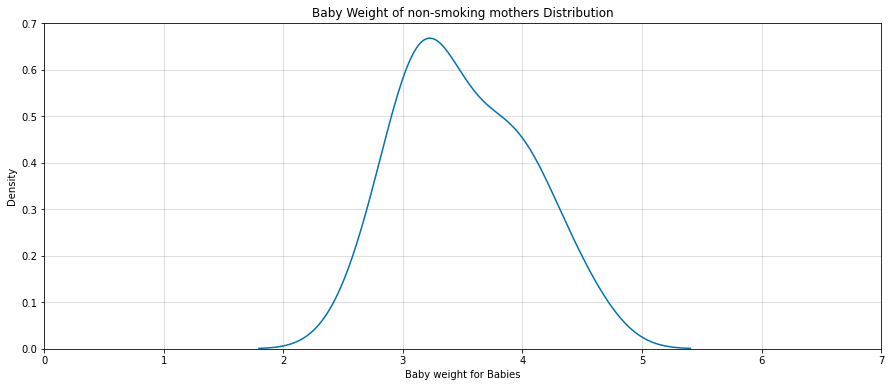

In [52]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['smoker'] == 'Non-smoker', 'Birthweight'], label = 'Birth weight for babies of non-smoking mothers')

plt.xlim(left=0, right=7)
plt.xlabel('Baby weight for Babies')
plt.ylabel('Density')
plt.title('Baby Weight of non-smoking mothers Distribution');


Birth weight data of non-smoking mothers are positive skewed. Also the mean of positively skewed data will be greater than the median. 

In [53]:
mean_1 = df_non_smoker[['Birthweight']].mean()
mean_1

Birthweight    3.5095
dtype: float64

In [54]:
median_1 = df_non_smoker[['Birthweight']].median()
median_1

Birthweight    3.385
dtype: float64

3.5095 > 3.385 so data are positively skewed.

### Q15. Are birth weight data for babies of smoking mothers normally distributed?

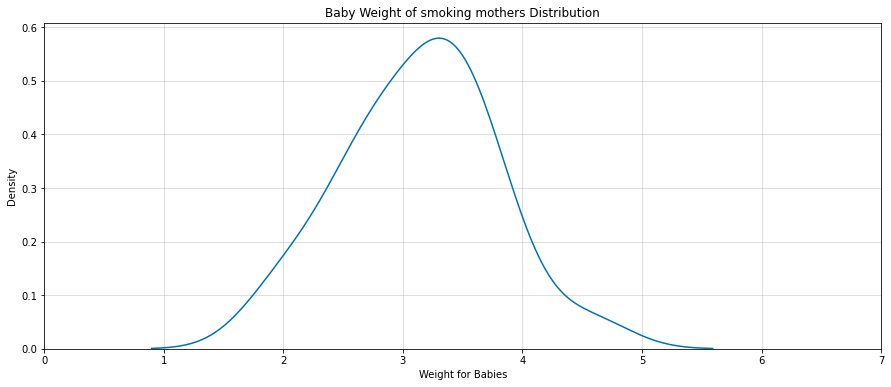

In [55]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['smoker'] == 'Smoker', 'Birthweight'], label = 'Birth weight for babies of smoking mothers')

plt.xlim(left=0, right=7)
plt.xlabel('Weight for Babies')
plt.ylabel('Density')
plt.title('Baby Weight of smoking mothers Distribution');

In [57]:
b = list(df_smoker["Birthweight"])

In [58]:
shapiro_test_2 = stats.shapiro(b)
shapiro_test_2

ShapiroResult(statistic=0.9824169278144836, pvalue=0.9494744539260864)

Data are normally distributed if the significance(pvalue) in these tests is > 0.05. Data are normaly distributed, 
because 0.949 > 0.05.

### Q16. What is the significance value for the above on the Shapiro-Wilk test?

In [61]:
print("Significance value for the above on the Shapiro-Wilk is % s "
                % shapiro_test_2.pvalue)

Significance value for the above on the Shapiro-Wilk is 0.9494744539260864 


In [60]:
type(shapiro_test_2)

scipy.stats.morestats.ShapiroResult

### Q17. Based on the dataset you have, how confident can you be in saying that a baby's birth weight will be +/- 1 standard deviation from the mean?

In [64]:
birthweight = list(df["Birthweight"])

In [68]:
mean_2 = statistics.mean(birthweight)
mean_2

3.3128571428571427

In [67]:
sd_2 = statistics.stdev(birthweight)
sd_2

0.603895022836148

The value of 0.603 (+1 sd) from the z score table is 0.72575. The value of -0.603 (-1 sd) from the z score table is 0.27425. From the difference between the two values, we can find the area under the curve.

In [70]:
area = 0.72575 - 0.27425
area

0.4515

Based on the dataset we have, we can be % 45,15 confident in saying that a baby's birth weight will be +/- 1 standard deviation from the mean.

### Q18. Based on the dataset you have, what is the probability that the birth weight for a baby of a smoking mother will be less than 4.2 kg?

In [80]:
birthweight_non = list(df_non_smoker["Birthweight"])
birthweight_non

[4.55,
 4.32,
 4.1,
 4.07,
 3.94,
 3.93,
 3.77,
 3.65,
 3.63,
 3.42,
 3.35,
 3.27,
 3.23,
 3.2,
 3.15,
 3.11,
 3.03,
 2.92,
 2.9,
 2.65]

In [74]:
mean_3 = statistics.mean(birthweight_non)
mean_3

3.5095

In [75]:
sd_3 = statistics.stdev(birthweight_non)
sd_3

0.5184945312608114

In [77]:
z_score_3 = (4.2 - 3.5095) / 0.5184945312608114
z_score_3

1.331740179247266

The value of 1.33 (for 4.2 kg) from the z score table is 0.90824. The probability that the birth weight for a baby of a smoking mother will be less than 4.2 kg is % 90.824.

### Q19. Are data for length of baby of non-smoking mothers normally distributed?

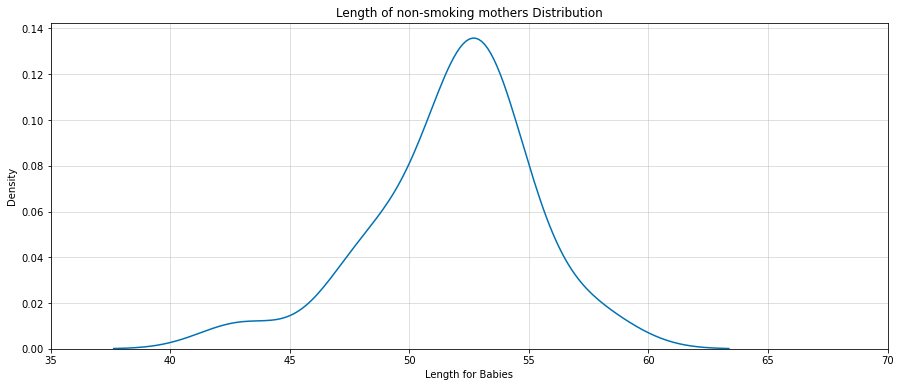

In [85]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['smoker'] == 'Non-smoker', 'Length'], label = 'Birth lenght for babies of non-smoking mothers')

plt.xlim(left=35, right=70)
plt.xlabel('Length for Babies')
plt.ylabel('Density')
plt.title('Length of non-smoking mothers Distribution');

In [94]:
c = list(df_non_smoker["Length"])

In [95]:
shapiro_test_3 = stats.shapiro(c)
shapiro_test_3

ShapiroResult(statistic=0.9122545123100281, pvalue=0.07037191092967987)

In [96]:
shapiro_test_3.pvalue

0.07037191092967987

Data are normally distributed if the significance(pvalue) in these tests is > 0.05. Data are normaly distributed, because 0.703 > 0.05.

### Q20. What is the significance value for the above on the Shapiro-Wilk test?

In [90]:
print("Significance value for the above on the Shapiro-Wilk is % s "
                % shapiro_test_3.pvalue)

Significance value for the above on the Shapiro-Wilk is 0.07037191092967987 


### Q21. What is the standard score for the length of a baby of 48.5cm for non-smoking mothers?

In [97]:
c = list(df_non_smoker["Length"])

In [98]:
mean_4 = statistics.mean(c)
mean_4

51.8

In [99]:
sd_4 = statistics.stdev(c)
sd_4

3.254147151591416

In [100]:
z_score_4 = (48.5 - mean_4) / sd_4  

In [102]:
print("The standard score for the length of a baby of 48.5cm for non-smoking mothers is % s "
                % z_score_4)

The standard score for the length of a baby of 48.5cm for non-smoking mothers is -1.0140905884929503 


### Q22. Based on the dataset you have, what is the probability that the length of baby for non-smoking mothers will be more than 55 cm?

In [106]:
length_non = list(df_non_smoker["Length"])
length_non

[56.0,
 53.0,
 58.0,
 53.0,
 54.0,
 51.0,
 52.0,
 53.0,
 54.0,
 50.0,
 53.0,
 51.0,
 52.0,
 53.0,
 53.0,
 48.0,
 48.0,
 48.0,
 53.0,
 43.0]

In [107]:
mean_5 = statistics.mean(length_non)
mean_5

51.8

In [108]:
sd_5 = statistics.stdev(length_non)
sd_5

3.254147151591416

In [109]:
z_score_5 = (55 - mean_5) / sd_5
z_score_5

0.9833605706598324

The value of 0.983 (for 55 cm) from the z score table is 0.83646. The probability that the length of baby for non-smoking mothers will be more than 55 cm is % 16.354.